# La teoría que nunca murió: De cómo la regla de Bayes permitió descifrar el código Enigma, perseguir los submarinos rusos y emerger triunfante de dos siglos de controversia

A continuación, concibió un experimento mental, una especie de simulación por ordenador en versión dieciochesca. Reduciendo el problema a sus elementos básicos, Bayes imaginó una mesa cuadrada tan plana y bien nivelada que al hacer rodar una pelota sobre ella ésta tuviera tantas probabilidades de ir a parar a un punto como de terminar en otro. Las generaciones posteriores darían a su construcción el nombre de «mesa de billar», pero en su calidad de ministro presbiteriano, Bayes habría desaprobado esa clase de juegos, y además su experimento no implicaba que las bolas tuvieran que rebotar en los bordes de la mesa o chocar entre sí. Lo que él tenía en mente era una prueba en la que una bola que se hiciera rodar al azar sobre la mesa tuviera las mismas posibilidades de detenerse en el punto A que de pararse en el punto B.Podemos imaginarle sentado de espaldas a la mesa para no poder ver nada de lo que viniese a suceder en ella. Después le observamos dibujar sobre un trozo de papel un cuadrado para representar la superficie de la mesa. Comienza pidiendo que un ayudante eche a rodar una imaginaria bola blanca sobre la superficie de la fingida mesa. Y como se halla de espaldas a ésta, Bayes no sabe dónde ha ido a parar la pelota experimental.Seguidamente, le imaginamos pidiendo a su colega que haga rodar una segunda bola sobre la mesa y le informe de si ésta viene a detenerse a la izquierda o a la derecha de la bola blanca. En caso de que lo haga a la izquierda, Bayes comprenderá que hay más probabilidades de que la bola blanca de referencia se halle detenida en la parte derecha de la mesa. De nuevo, el amigo de Bayes impulsa la bola y refiere únicamente si ésta se frena a la derecha o a la izquierda de la bola de prueba. Si lo hace a la derecha, Bayes inferirá que la bola testigo no puede hallarse en el borde derecho de la mesa.Bayes va pidiendo a su colega que eche a rodar, una y otra, y otra vez, la bola del experimento. Los jugadores y los matemáticos ya sabían que cuantas más veces lanzaran una moneda al aire, tanto más fiables serían sus conclusiones. Lo que Bayes descubrió fue que al aumentar el número de bolas que se echaban a rodar por la mesa, cada nuevo dato registrado hacía que las oscilaciones del punto de asiento de su imaginaria bola blanca de referencia se movieran en un área cada vez más restringida.Por poner un caso extremo, si todas las bolas lanzadas después de la primera viniesen a detenerse a la derecha de ésta, Bayes tendría que concluir que lo más probable era que su bola de control se hallara situada en el extremo marginal izquierdo de la mesa. Por el contrario, si todos los lanzamientos dieran en quedar ubicados a la izquierda de la primera bola, lo más probable sería que ésta se hallase en el borde derecho. Al final, suponiendo que se hubiera lanzado la bola un número de veces suficiente, Bayes podía reducir progresivamente el área de la posible ubicación de la bola de control.La genialidad del experimento de Bayes radicaba en el hecho de concebir la idea de estrechar la gama de posiciones posibles de la bola inicial e inferir —basándose en tan escasa información— que se hallaba detenida en algún punto situado entre dos límites concretos. Este enfoque era incapaz de generar una respuesta correcta. Bayes nunca tendría la posibilidad de saber con precisión el emplazamiento exacto de la bola blanca, pero podría afirmar con creciente confianza que lo más probable era que se encontrara inscrita en un determinado espacio. De este modo, el sencillo y limitado sistema de Bayes pasaba de las observaciones del mundo a su origen o causa probables. Valiéndose de este conocimiento del presente (es decir, de la información sobre las posiciones de las bolas lanzadas, bien a la derecha, bien a la izquierda de la bola de control), Bayes había imaginado un método para afirmar algo acerca del pasado (esto es, acerca de la posición de la primera bola). Hasta le resultaba posible valorar el grado de confianza que podía depositar en la conclusión a la que hubiese llegado.
   

In [1]:
import random as r
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Simulación del experimento



# En función de la proporción de derechas e izquierdas podremos hacer una estimación de la posición de la bola original.

# Podremos ir viendo como va evolucionando la predicción conforme se van haciendo más simulaciones.

In [10]:
# Introducir datos para la simulacion
total_lanzamientos =int(input("Introduce el número de lanzamientos"))
print(total_lanzamientos)

Introduce el número de lanzamientos1000
1000


In [11]:
# Simular el lanzamiento de una bola. La posición la definiremos entre dos números (a,b), en nuestro caso 0 y 100

bola_inicial = (r.random()*100)
print ("La bola inicial está en la posición: ",bola_inicial)

df = pd.DataFrame()
df['Intento'] = None
df['Estimacion'] = None
df['Error'] = None

# A partir de ahí simularemos n lanzamientos (también entre a y b) y obtendremos si cada lanzamiento ha ido a la derecha (número superior) o a la izquierda (número inferior).

lanzamientos=0
derecha=0
izquierda=0

while (lanzamientos < total_lanzamientos):
    bola = (r.random()*100)
    if bola < bola_inicial:
        izquierda = izquierda + 1
    else:
        derecha = derecha +1
    lanzamientos = lanzamientos+1
    estimacion = (izquierda / lanzamientos) * 100
    error = bola_inicial - estimacion
    nueva_fila = { 'Intento': lanzamientos, 'Estimacion': estimacion, 'Error': error} 
    df = df.append(nueva_fila, ignore_index=True)

    
print(df)

La bola inicial está en la posición:  28.653060886573833
     Intento  Estimacion      Error
0        1.0    0.000000  28.653061
1        2.0   50.000000 -21.346939
2        3.0   33.333333  -4.680272
3        4.0   25.000000   3.653061
4        5.0   20.000000   8.653061
..       ...         ...        ...
995    996.0   29.518072  -0.865011
996    997.0   29.588766  -0.935705
997    998.0   29.659319  -1.006258
998    999.0   29.729730  -1.076669
999   1000.0   29.800000  -1.146939

[1000 rows x 3 columns]


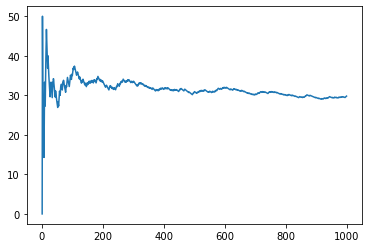

In [12]:
# Gráfico de estimación
fig, ax = plt.subplots()
# Dibujar puntos
ax.plot(df["Intento"], df["Estimacion"])
# Mostrar el gráfico
plt.show()

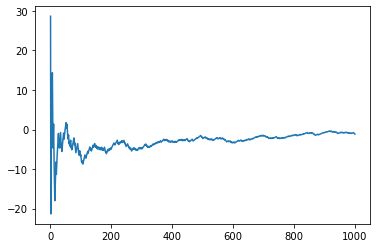

In [13]:
# Gráfico de error de estimación
fig, ax = plt.subplots()
# Dibujar puntos
ax.plot(df["Intento"], df["Error"])
# Mostrar el gráfico
plt.show()